In [1]:
import django
import os
import json
os.environ['DJANGO_SETTINGS_MODULE'] = 'django_settings'
django.setup()

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [3]:
from mondebro.models import *

In [4]:
p = ProductMaster.objects.first()

mondebro


In [5]:
Categories.objects.get_or_create(master=p)

(<Categories: Categories object (1)>, True)

In [12]:
ProductMaster.objects.first()

mondebro


<ProductMaster: ProductMaster object (100)>

In [8]:
Categories.objects.first()

mondebro


<Categories: Categories object (1)>

In [9]:
aws_url = 'https://monde-web-crawler.s3.ap-northeast-2.amazonaws.com/'

In [38]:
def get_image_N_obj(n):
    ids = int(n)
    p = ProductMaster.objects.get(pk=ids)
    url = p.product_image.name
    URL = aws_url + url
    print(p)
    print(URL)
    print(p.product_url)
    display(Image(requests.get(URL).content ,height=10))
    c, flag = Categories.objects.get_or_create(master=p)
    print(flag)
    return c

mondebro
ProductMaster object (129)
https://monde-web-crawler.s3.ap-northeast-2.amazonaws.com/crawled-image/VKYEFT3I3YC_6.jpg
http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=36502&xcode=038&mcode=004&scode=&type=X&sort=order&cur_code=038&GfDT=a2Z3U1U%3D


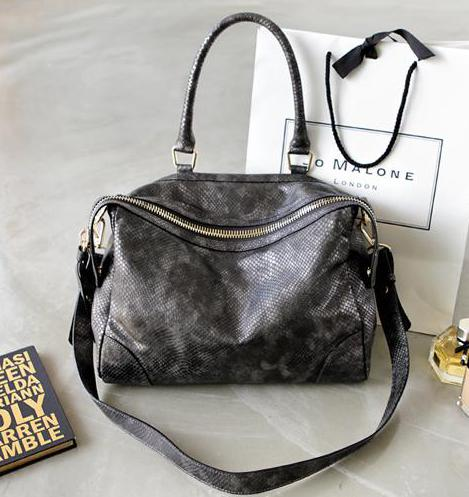

True


In [151]:
categories = get_image_N_obj(129)

In [149]:
types = {'hand_bag':1,'corss_bag':0,'mini_bag':0,'big_shoulder':0,'clutch_bag':0,'backpack':0}
shape = {'square':1}
charm = {'nothing':1}
deco = {'nothing':1}
pattern = {'nothing':1}

In [150]:
categories.type_result = types
categories.shape_result = shape
categories.charm_result = charm
categories.deco_result = deco
categories.pattern_result = pattern
categories.save()

In [147]:
Categories.objects.last()

mondebro


<Categories: Categories object (28)>

In [77]:
categories.type_result

{'hand_bag': 0,
 'corss_bag': 0,
 'mini_bag': 0,
 'big_shoulder': 0,
 'clutch_bag': 1,
 'backpack': 0}

In [75]:
categories.type_result = {'hand_bag':0,'corss_bag':0,'mini_bag':0,'big_shoulder':1,'clutch_bag':0,'backpack':0}
categories.save()